# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


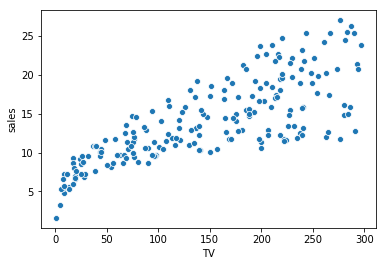

In [6]:
plt.figure()
sns.scatterplot(data=df,x="TV", y="sales")
plt.show()

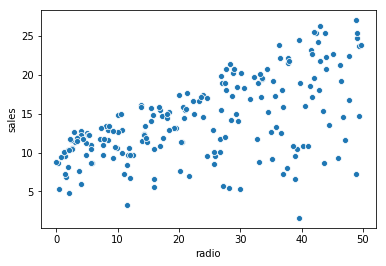

In [7]:
plt.figure()
sns.scatterplot(data=df,x="radio", y="sales")
plt.show()

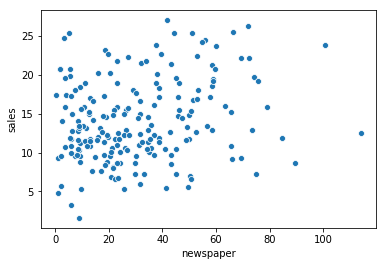

In [8]:
plt.figure()
sns.scatterplot(data=df,x="newspaper", y="sales")
plt.show()

In [9]:
cor = df.corr()

In [10]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


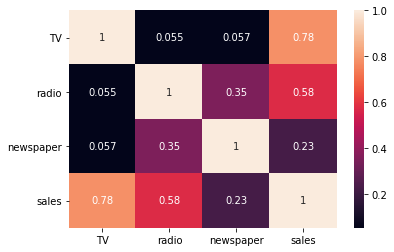

In [11]:
plt.figure()
sns.heatmap(cor,annot=True)
plt.show()

## Modeling with TV

In [12]:
X = df[["TV"]]
y = df["sales"]

### split data for train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

### Training

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lr.intercept_

6.923519536059554

In [17]:
lr.coef_

array([0.04812204])

### Testing

In [18]:
y_pred = lr.predict(X_test)

In [19]:
mean_squared_error(y_test,y_pred)

10.571057434656955

In [20]:
r2_score(y_test,y_pred)

0.575061860494331

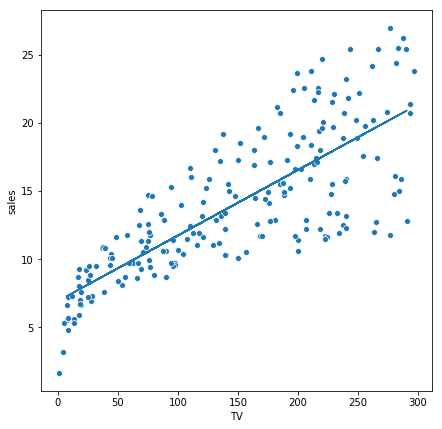

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="TV", y="sales")
plt.plot(X_test["TV"],y_pred)
plt.show()

## Modeling with Radio

In [22]:
X = df[["radio"]]
y = df["sales"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.intercept_

9.440936561425886

In [26]:
lr.coef_

array([0.1874808])

In [27]:
y_pred = lr.predict(X_test)

In [28]:
mean_squared_error(y_test,y_pred)

14.604130559272193

In [29]:
r2_score(y_test,y_pred)

0.41293932917162335

## Modeling with Newspaper

In [30]:
X = df[["newspaper"]]
y = df["sales"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr.intercept_

11.82966888487788

In [34]:
lr.coef_

array([0.06532045])

In [35]:
y_pred = lr.predict(X_test)

In [36]:
mean_squared_error(y_test,y_pred)

25.497452374414927

In [37]:
r2_score(y_test,y_pred)

-0.024953278429509007

## Multiple linear regression

In [38]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr.intercept_

2.9372157346906125

In [42]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [43]:
y_pred = lr.predict(X_test)

In [44]:
mean_squared_error(y_test,y_pred)

1.9289249074665737

In [45]:
r2_score(y_test,y_pred)

0.9224605706201434

## Assumptions of Linear Regression

In [46]:
X = df[["TV","radio"]]
y = df["sales"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr.intercept_

2.9647671191401574

In [50]:
lr.coef_

array([0.04697554, 0.17765046])

In [51]:
y_pred = lr.predict(X_test)

In [52]:
mean_squared_error(y_test,y_pred)

1.9147050289721788

In [53]:
r2_score(y_test,y_pred)

0.9230321850256801

In [54]:
residuals = y_test - y_pred

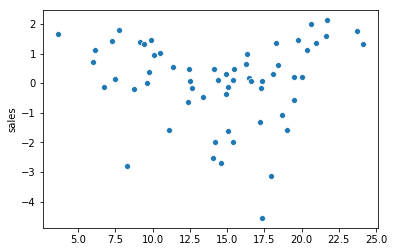

In [55]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

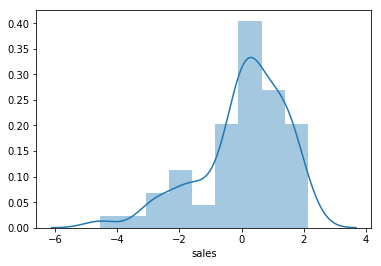

In [56]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Polynomial regression

In [57]:
# Linear 
def poly_1(x):
    
    y = 4*x + 5
    return y    


# Quadratic
def poly_2(x):
    
    y = 6*(x**2) + 4*x + 5
    return y

# Cubic
def poly_3(x):
    
    y = 8*(x**3) + 6*(x**2) + 4*x + 5
    return y


# Plot
def plot(x,y):
    
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [58]:
x = np.arange(-100,100)

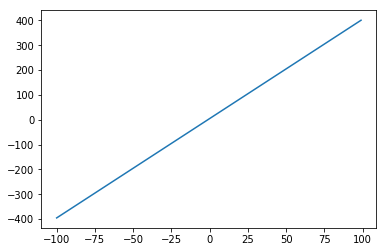

In [59]:
# plot linear relation

y = poly_1(x)
plot(x,y)

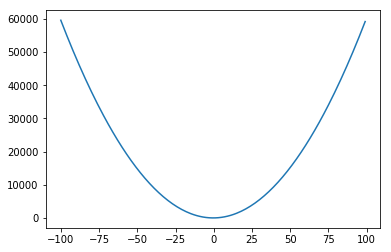

In [60]:
# plot quadratic relation

y = poly_2(x)
plot(x,y)

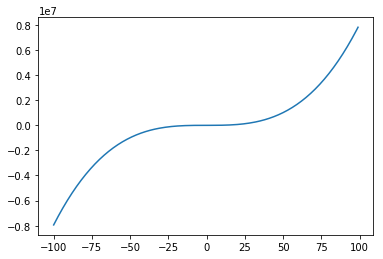

In [61]:
# plot cubic relation

y = poly_3(x)
plot(x,y)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
X = df[["TV","radio"]]
y = df["sales"]

In [64]:
pf = PolynomialFeatures(2)

In [65]:
X_poly = pf.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1,test_size=0.3)

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = lr.predict(X_test)

In [69]:
mean_squared_error(y_test,y_pred)

0.17238345081004028

In [70]:
r2_score(y_test,y_pred)

0.9930704848288281

In [71]:
residuals = y_test - y_pred

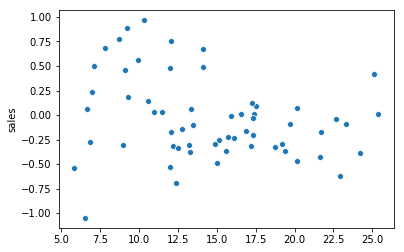

In [72]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

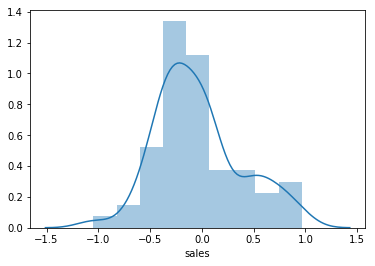

In [73]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Gradient descent

In [92]:
def gradient_descent(x,y):
    
    
    n = len(x)
    learning_rate = 0.01
    intercept = slope = 0
    iterations = 5000
    
    for i in range(iterations):
        
        y_pred = x*slope + intercept
        
        mse = mean_squared_error(y_pred,y)
        
        md = (2/n)*sum(x*(y-y_pred))
        bd = (2/n)*sum(y-y_pred)

        slope = slope + (learning_rate * md)
        intercept = intercept + (learning_rate * bd)
        
        print("slope: ",slope,"intercept: ",intercept,"mse: ",mse,"iteration: ",i)

In [93]:
x = np.array([10,12,13,14,20,21])
y = np.array([12,12,13,15,16,26])

In [94]:
gradient_descent(x,y)

slope:  5.03 intercept:  0.31333333333333335 mse:  269.0 iteration:  0
slope:  -14.345666666666666 intercept:  -0.8886000000000002 mse:  3890.8565666666673 iteration:  1
slope:  60.28830222222222 intercept:  3.7462053333333323 mse:  57630.48295214518 iteration:  2
slope:  -227.1990201185185 intercept:  -14.101876106666666 mse:  854997.0590517033 iteration:  3
slope:  880.1901399529875 intercept:  54.65320078435553 mse:  12685995.864658995 iteration:  4
slope:  -3385.428163388425 intercept:  -210.18357188389444 mse:  188229512.38211393 iteration:  5
slope:  13045.559697887466 intercept:  809.9618819036443 mse:  2792872340.717798 iteration:  6
slope:  -50245.937406473044 intercept:  -3119.591931767335 mse:  41439496253.611626 iteration:  7
slope:  193550.33430434347 intercept:  12016.894462143257 mse:  614862279453.0112 iteration:  8
slope:  -745542.9865052928 intercept:  -46288.23038506931 mse:  9123074769973.854 iteration:  9
slope:  2871806.280719143 intercept:  178300.74350755318 mse

slope:  -4.972178949344966e+86 intercept:  -3.087057623307e+85 mse:  4.057776757061925e+174 iteration:  147
slope:  1.915263103452158e+87 intercept:  1.1891220377194038e+86 mse:  6.020763021579154e+175 iteration:  148
slope:  -7.377515557698188e+87 intercept:  -4.580449713391458e+86 mse:  8.933361673711647e+176 iteration:  149
slope:  2.841788979591146e+88 intercept:  1.7643705953970933e+87 mse:  1.325495630824688e+178 iteration:  150
slope:  -1.094645553962797e+89 intercept:  -6.796283755284286e+87 mse:  1.966716149538096e+179 iteration:  151
slope:  4.2165301414565746e+89 intercept:  2.6179008538705297e+88 mse:  2.9181329028202103e+180 iteration:  152
slope:  -1.6241902567866322e+90 intercept:  -1.0084047587576606e+89 mse:  4.329806129126396e+181 iteration:  153
slope:  6.256314793778154e+90 intercept:  3.8843341067773895e+89 mse:  6.424389066619407e+182 iteration:  154
slope:  -2.4099070066019576e+91 intercept:  -1.496229695669262e+90 mse:  9.532245474377942e+183 iteration:  155
slo

slope:  8.067857450198155e+159 intercept:  5.009059629414485e+158 mse:  inf iteration:  272
slope:  -3.107705868130869e+160 intercept:  -1.9294693913768267e+159 mse:  inf iteration:  273
slope:  1.197075657624297e+161 intercept:  7.432237600843317e+159 mse:  inf iteration:  274
slope:  -4.611086733695668e+161 intercept:  -2.862867687990246e+160 mse:  inf iteration:  275
slope:  1.7761718509806434e+162 intercept:  1.1027649866856561e+161 mse:  inf iteration:  276
slope:  -6.841741711693036e+162 intercept:  -4.247805865989987e+161 mse:  inf iteration:  277
slope:  2.6354110737469672e+163 intercept:  1.6362375386408917e+162 mse:  inf iteration:  278
slope:  -1.0151496242189268e+164 intercept:  -6.302720433372829e+162 mse:  inf iteration:  279
slope:  3.9103150541393375e+164 intercept:  2.427782270186243e+163 mse:  inf iteration:  280
slope:  -1.5062374508973047e+165 intercept:  -9.351718537635494e+163 mse:  inf iteration:  281
slope:  5.801965384052573e+165 intercept:  3.6022439360036353e

slope:  -7.749000641477586e+217 intercept:  -4.8110922287774153e+216 mse:  inf iteration:  371
slope:  2.9848835225860735e+218 intercept:  1.8532131540230887e+217 mse:  inf iteration:  372
slope:  -1.1497649897867307e+219 intercept:  -7.138501676815594e+217 mse:  inf iteration:  373
slope:  4.4288479658795806e+219 intercept:  2.7497218050322637e+218 mse:  inf iteration:  374
slope:  -1.7059742190022688e+220 intercept:  -1.0591816528707122e+219 mse:  inf iteration:  375
slope:  6.571343289094818e+220 intercept:  4.079924637193508e+219 mse:  inf iteration:  376
slope:  -2.5312547013979275e+221 intercept:  -1.5715703722834819e+220 mse:  inf iteration:  377
slope:  9.750290133193894e+221 intercept:  6.053625139355971e+220 mse:  inf iteration:  378
slope:  -3.755772093142394e+222 intercept:  -2.3318317763012834e+221 mse:  inf iteration:  379
slope:  1.4467081310334882e+223 intercept:  8.982121138651924e+221 mse:  inf iteration:  380
slope:  -5.572660865710993e+223 intercept:  -3.45987652151

slope:  -2.6867952299691027e+269 intercept:  -1.668140222112017e+268 mse:  inf iteration:  459
slope:  1.0349425921544919e+270 intercept:  6.425608272237531e+268 mse:  inf iteration:  460
slope:  -3.9865567614089316e+270 intercept:  -2.4751181657841968e+269 mse:  inf iteration:  461
slope:  1.535605446370776e+271 intercept:  9.534054481758282e+269 mse:  inf iteration:  462
slope:  -5.915089707866583e+271 intercept:  -3.6724789999000163e+270 mse:  inf iteration:  463
slope:  2.27846849168189e+272 intercept:  1.4146239703697733e+271 mse:  inf iteration:  464
slope:  -8.776567937225004e+272 intercept:  -5.449073984083292e+271 mse:  inf iteration:  465
slope:  3.380698264555168e+273 intercept:  2.0989611307273388e+272 mse:  inf iteration:  466
slope:  -1.3022312181383299e+274 intercept:  -8.085112885552711e+272 mse:  inf iteration:  467
slope:  5.0161416748535896e+274 intercept:  3.1143525916308234e+273 mse:  inf iteration:  468
slope:  -1.932197366468768e+275 intercept:  -1.19963594847625

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').